# Advanced Lane Line Detection Project

This project is part of the Self Driving Car Engineer Nanodegree Programm of Udacity

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pickle

In [ ]:
os.listdir("camera_cal/")

In [ ]:
cal_image_paths = ["camera_cal/"+image for image in os.listdir("camera_cal/")]
cal_images = [mpimg.imread(cal_image_path) for cal_image_path in cal_image_paths]

In [ ]:
for cal_image in cal_images:
    print(cal_image.shape)

In [ ]:
plt.imshow(cal_images[0])

In [ ]:
def grayscale_conversion(images):
    grays = []
    for image in images:
        grays.append(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    return grays

In [ ]:
def get_object_image_points(grays, nx, ny,):
    
    objpoints = []
    imgpoints = []

    objp = np.zeros((nx*ny, 3), np.float32)
    objp[:,:2] = np.mgrid[0:nx,0:ny].T.reshape(-1,2)
    
    for gray in grays:
        ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

        # If found, draw corners
        if ret == True:
            # Draw and display the corners
            imgpoints.append(corners)
            objpoints.append(objp)
    return objpoints, imgpoints

In [ ]:
def get_calibration_coef(images, nx, ny):
    grays = grayscale_conversion(images)
    objpoints, imgpoints = get_object_image_points(images, nx, ny)
    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, grays[0].shape[::-1], None, None)
    data = {
    'ret': ret,
    'mtx': mtx,
    'dist': dist,
    'rvecs': rvecs,
    'tvecs': tvecs        
    }

    with open('camera_cal/calibration_data.p', 'wb') as f:
        # Pickle the 'data' dictionary using the highest protocol available.
        pickle.dump(data, f, pickle.HIGHEST_PROTOCOL)
    f.close()
    return ret, mtx, dist, rvecs, tvecs

In [ ]:
ret, mtx, dist, rvecs, tvecs = get_calibration_coef(cal_images, 9, 6)

In [ ]:
def undistor_images(images, path_names):
    
    if os.path.exists('camera_cal/calibration_data.p'):
        with open('camera_cal/calibration_data.p', 'rb') as f:
            cal_data = pickle.load(f)
            f.close()
        mtx = cal_data["mtx"]
        dist = cal_data["dist"]
    else:
        ret, mtx, dist, rvecs, tvecs = get_calibration_coef(images, 9, 6)
    for img, path_name in zip(images, path_names):
        file_name = path_name.split(".")[0]
        file_type = path_name.split(".")[1]
        undist = cv2.undistort(img, mtx, dist, None, mtx)
        mpimg.imsave(file_name+"_undist."+file_type, undist)
        

In [ ]:
undistor_images(cal_images, cal_image_paths)

In [2]:
def print_images(images, grayscale = False):
    '''This is a helper function to print multiple images in one plot. 
    Grayscale images are shown with the boolean `grayscale` input '''
    no_channels = len(images)
    no_images = len(images[0])
    if no_channels > 1:
        f, axarr = plt.subplots(no_images, no_channels, figsize = (15, 30))
        for i,channel in enumerate(images):
            for k, image in enumerate(channel):
                axarr[k][i].imshow(image, cmap = 'gray' if grayscale[i] else 'brg')
    else:
        f, axarr = plt.subplots(no_images, 1, figsize = (15, 30))
        for i, image in enumerate(images[0]):
            axarr[i].imshow(image, cmap = 'gray' if grayscale else 'brg')

In [3]:
folder = "test_images/"
test_image_paths = [folder+image for image in os.listdir(folder)]
test_images = [mpimg.imread(test_image_path) for test_image_path in test_image_paths]

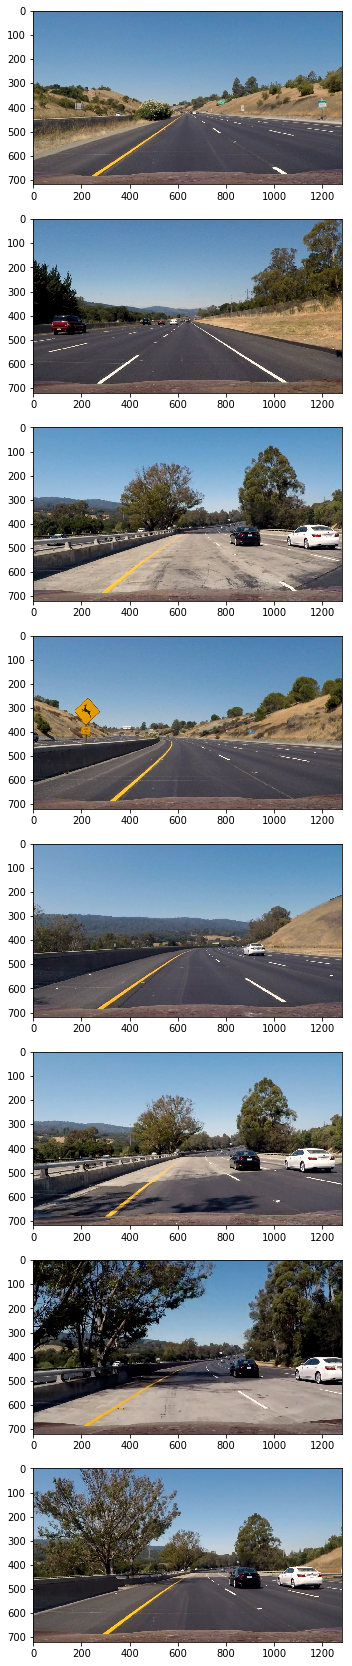

In [4]:
print_images([test_images])